In [ ]:
# Step 1:  Define directories and parameters for output and Vina results.
# Specifying Top N (ex. Top 100)

import os, math, requests
from time import sleep
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns

output_dir = '/content/output'  # Path for output folder
vina_csv_path = '/content/your_docking_results.csv'  # Path for Vina results CSV
top_n = 100  # Top n
ligand_name = 'your_ligand_name' # Specify the ligand name

# Create output directories
os.makedirs(f'{output_dir}/string_result/{ligand_name}', exist_ok=True)

# Read the CSV file
df = pd.read_csv(vina_csv_path)

# Treat the second column (index 1) as the score
df_sorted = df.sort_values(df.columns[1], ascending=True)  # Sort by the second column (score)
df_top_n = df_sorted.head(top_n)  # Get the top N rows

# Save the top N rows data as a CSV
df_top_n.to_csv(f"{output_dir}/string_result/{ligand_name}/top_{top_n}_results.csv", index=False)
print(f"Saved the top {top_n} data for ligand {ligand_name}!")


Saved the top 5 data for ligand PFOS!


In [ ]:
# Step 1:  Define directories and parameters for output and Vina results.
# Filtering by score (ex.score<=-8)

import os, math, requests
from time import sleep
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns

output_dir = '/content/output'  # Path for output folder
vina_csv_path = '/content/your_docking_results.csv'  # Path for Vina results CSV
thre_score = -8  # Score threshold
ligand_name = 'your_ligand_name'  # Specify the ligand name

# Create output directories
os.makedirs(f'{output_dir}/string_result', exist_ok=True)

# Read the CSV file
df = pd.read_csv(vina_csv_path)

# Filter rows where the score is less than or equal to the threshold
df_filtered = df[df.iloc[:, 1] <= thre_score]  # 2nd column (index 1) as the score

# Save the filtered rows data as a CSV
df_filtered.to_csv(f"{output_dir}/string_result/{ligand_name}/score_threshold_{thre_score}_results.csv", index=False)
print(f"Saved the data with scores <= {thre_score}!")

Saved the data with scores <= -8!


In [ ]:
#Step 2: Read Vina results CSV, rename a specific column, and save the modified DataFrame.

import pandas as pd

# Specify the path to the Vina results CSV file/
vina_csv_path = 'your_filtered_vina_csv_path'

# Read the CSV file
df_vina_result = pd.read_csv(vina_csv_path, index_col=0)

# Display and check the column names
print("Original DataFrame column names:", df_vina_result.columns)

# Rename the column
df_vina_result.rename(columns={'your_colums_name': 'vina_score'}, inplace=True)

# Recheck the column names
print("Column names after change:", df_vina_result.columns)

# Optionally save the modified DataFrame
df_vina_result.to_csv('new_docking_results.csv')  # Specify the path for saving


Original DataFrame column names: Index(['/content/Conformer3D_COMPOUND_PFOS_74483.pdbqt'], dtype='object')
Column names after change: Index(['vina_score'], dtype='object')


In [ ]:
# Step 3: Map species to NCBI IDs and prompt user for selection.

species_ncbi_ids = {
    'Arabidopsis': 3702,
    'Nematode worm': 6239,
    'C. albicans': 237561,
    'Zebrafish': 7955,
    'Dictyostelium': 44689,
    'Fruit fly': 7227,
    'E. coli': 83333,
    'Soybean': 3847,
    'Human': 9606,
    'M. jannaschii': 243232,
    'Mouse': 10090,
    'Asian rice': 39947,
    'Rat': 10116,
    'Budding yeast': 559292,
    'Fission yeast': 284812,
    'Maize': 4577,
    'Ajellomyces capsulatus': 447093,
    'Brugia malayi': 6279,
    'C. jejuni': 192222,
    'Cladophialophora carrionii': 86049,
    'Dracunculus medinensis': 318479,
    'Enterococcus faecium': 1352,
    'Fonsecaea pedrosoi': 1442368,
    'H. influenzae': 71421,
    'H. pylori': 85962,
    'K. pneumoniae': 1125630,
    'L. infantum': 5671,
    'Madurella mycetomatis': 100816,
    'Mycobacterium leprae': 272631,
    'M. tuberculosis': 83332,
    'Mycobacterium ulcerans': 1299332,
    'N. gonorrhoeae': 242231,
    'Nocardia brasiliensis': 1133849,
    'Onchocerca volvulus': 6282,
    'Paracoccidioides lutzii': 502779,
    'P. falciparum': 36329,
    'P. aeruginosa': 208964,
    'S. typhimurium': 99287,
    'Schistosoma mansoni': 6183,
    'S. dysenteriae': 300267,
    'Sporothrix schenckii': 1391915,
    'S. aureus': 93061,
    'S. pneumoniae': 171101,
    'Strongyloides stercoralis': 6248,
    'Trichuris trichiura': 36087,
    'Trypanosoma brucei': 185431,
    'T. cruzi': 353153,
    'Wuchereria bancrofti': 6293,
}

# Prompt the user to select a species
print("Please select a species:")
for index, species in enumerate(species_ncbi_ids.keys(), 1):
    print(f"{index}. {species}")

# Receive input for Google Colab
selection = input("Please enter the number corresponding to your desired species: ")

# Validate user input
try:
    selection_index = int(selection)
    if 1 <= selection_index <= len(species_ncbi_ids):
        selected_species = list(species_ncbi_ids.keys())[selection_index - 1]
        ncbi_id = species_ncbi_ids[selected_species]
        print(f"NCBI ID of {selected_species}: {ncbi_id}")
    else:
        raise ValueError
except ValueError:
    print("Invalid input. Please enter a valid number.")

Please select a species:
1. Arabidopsis
2. Nematode worm
3. C. albicans
4. Zebrafish
5. Dictyostelium
6. Fruit fly
7. E. coli
8. Soybean
9. Human
10. M. jannaschii
11. Mouse
12. Asian rice
13. Rat
14. Budding yeast
15. Fission yeast
16. Maize
17. Ajellomyces capsulatus
18. Brugia malayi
19. C. jejuni
20. Cladophialophora carrionii
21. Dracunculus medinensis
22. Enterococcus faecium
23. Fonsecaea pedrosoi
24. H. influenzae
25. H. pylori
26. K. pneumoniae
27. L. infantum
28. Madurella mycetomatis
29. Mycobacterium leprae
30. M. tuberculosis
31. Mycobacterium ulcerans
32. N. gonorrhoeae
33. Nocardia brasiliensis
34. Onchocerca volvulus
35. Paracoccidioides lutzii
36. P. falciparum
37. P. aeruginosa
38. S. typhimurium
39. Schistosoma mansoni
40. S. dysenteriae
41. Sporothrix schenckii
42. S. aureus
43. S. pneumoniae
44. Strongyloides stercoralis
45. Trichuris trichiura
46. Trypanosoma brucei
47. T. cruzi
48. Wuchereria bancrofti
Please enter the number corresponding to your desired species

In [ ]:
# Step 4: Extract UniProt IDs and retrieve STRING identifiers from the STRING API.

import requests
from time import sleep
import pandas as pd
import os

# Load Vina results CSV file
vina_csv_path = "your_new_vina_csv_path"  # Specify the path to the CSV file
df_vina_result = pd.read_csv(vina_csv_path, index_col=0)

# Retrieve AF (AlphaFold) list
AFs = df_vina_result.index.values.tolist()

# Get UniProt names
UFs = []
uniprots = []
for AF in AFs:
    UFs.append(AF.replace('AF-', '').replace('-model_v4', ''))

# Retrieve the list of UniProt names
for UF in UFs:
    uniprots.append(UF.split("-")[0])

# Remove duplicates from UniProt names
uniprots = list(set(uniprots))

# Display the results
print("Extracted UniProt IDs:", uniprots)

# Specify the NCBI ID of the selected species (e.g., 9606 is for humans)
selected_species_ncbi_id = species_ncbi_ids[selected_species]

# STRING API settings
string_api_url = "https://version-11-5.string-db.org/api"
output_format = "tsv-no-header"
method = "get_string_ids"

# Split UniProt IDs into lists of 2000
uniprots_split_list = [uniprots[i:i + 2000] for i in range(0, len(uniprots), 2000)]

output_lines = []
uniprot_string = {}

# Send requests to the STRING API
for uniprots_split in uniprots_split_list:
    params = {
        "identifiers": "\r".join(uniprots_split),  # Send UniProt IDs separated by newline
        "species": selected_species_ncbi_id,  # Selected species NCBI ID
        "limit": 1,  # Retrieve one (best) ID for each input protein
        "echo_query": 1,  # Include the input IDs in the output
        "caller_identity": "www.awesome_app.org"  # Application name
    }

    # Construct the request URL
    request_url = f"{string_api_url}/{output_format}/{method}"

    # Call the STRING API
    results = requests.post(request_url, data=params)

    # Read and parse the results
    for line in results.text.strip().split("\n"):
        l = line.split("\t")
        input_identifier, string_identifier = l[0], l[2]
        uniprot_string[input_identifier] = string_identifier
        output_lines.append(f"Input: {input_identifier}\tSTRING: {string_identifier}")

    # Call the API with intervals
    sleep(1)

# Write the results to a text file
output_dir = "/content/output"  # Specify the output directory
string_id_file_path = f'{output_dir}/string_api_mapping.txt'

# Create the output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Write the results to the file
with open(string_id_file_path, "w") as output_file:
    output_file.write("\n".join(output_lines))

print(f"Mapping results saved to {string_id_file_path}")

Extracted UniProt IDs: ['Q58569', 'Q58563', 'Q57695', 'Q58396', 'Q58441']
Mapping results saved to /content/output/string_api_mapping.txt


In [ ]:
#Step 5: Retrieve a network image from STRING based on their identifiers.

import pandas as pd
import math
import requests
from PIL import Image
import os

# Specify the path to the Vina results CSV file
vina_csv_path = 'your_new_vina_csv_path'  # Specify the path to the Vina results CSV file here

# Read the Vina results CSV file
df_vina_result = pd.read_csv(vina_csv_path, index_col=0)

# Get UniProt names and remove duplicates
AFs = df_vina_result.index.values.tolist()
uniprots = list(set(AF.replace('AF-', '').replace('-model_v4.pdbqt', '').split("-")[0] for AF in AFs))

# Calculate minimum scores for each UniProt
uniprot_score = {}
for uniprot in uniprots:
    s_UFs = [AF for AF in AFs if AF.startswith(f"AF-{uniprot}-")]
    min_score = float('inf')  # Initialize minimum score

    for s_UF in s_UFs:
        index_key = s_UF  # Use the existing format directly
        if index_key in df_vina_result.index:  # Check index existence
            s_UF_score = df_vina_result.at[index_key, "vina_score"]
            # Update minimum score only if score is valid
            if not math.isnan(s_UF_score) and s_UF_score < min_score:
                min_score = s_UF_score

    uniprot_score[uniprot] = min_score

# Retrieve STRING ID mappings
uniprot_string_top_n = {uniprot: uniprot_string[uniprot] for uniprot, _ in uniprot_score.items() if uniprot in uniprot_string}

# Convert the retrieved STRING IDs into a newline-separated string
identifiers_top_n = "\r\n".join(uniprot_string_top_n.values())

# Set the output directory
output_dir = '/content/results'
ligand_name = 'your_ligand_name'  # Change ligand name as appropriate
output_image_dir = f'{output_dir}/string_result/{ligand_name}'
os.makedirs(output_image_dir, exist_ok=True)  # Create the directory if it does not exist

# Set up the STRING API
string_api_url = "https://string-db.org/api"
output_format = "image"
method_network = "network"

# API endpoint
network_url = f"{string_api_url}/{output_format}/{method_network}"

# Parameters for STRING API
params_network = {
    "identifiers": identifiers_top_n,
    "species": species_ncbi_ids[selected_species],
    "required_score": 400,
    "network_type": "functional"
}

# Retrieve the network image
network_response = requests.get(network_url, params=params_network)

if network_response.status_code == 200:
    output_image_path = f'{output_image_dir}/network_image.png'
    with open(output_image_path, 'wb') as fh:
        fh.write(network_response.content)

    # Open the image and set the background to white
    img = Image.open(output_image_path)
    new_img = Image.new("RGB", img.size, "WHITE")
    new_img.paste(img, (0, 0), img)
    new_img.save(output_image_path)
    print(f"Network image saved: {output_image_path}")
else:
    print("Network retrieval failed:", network_response.status_code, network_response.text)

# Display results
print("UniProt IDs and their scores:")
for uniprot, score in uniprot_score.items():
    print(f"{uniprot}: {score}")

print(f"STRING IDs for UniProt IDs:\n{identifiers_top_n}")

Network image saved: /content/results/string_result/PFOS/network_image.png
UniProt IDs and their scores:
Q58569: -8.4
Q58563: -6.1
Q57695: -7.7
Q58396: -6.1
Q58441: -6.9
STRING IDs for UniProt IDs:
243232.MJ_1169
243232.MJ_1163
243232.MJ_0244
243232.MJ_0989
243232.MJ_1035


In [ ]:
# Step 6: Retrieve functional annotation data from STRING and save it as a CSV file.

import requests
import pandas as pd
from io import StringIO
import os

# Set the STRING API URL and output format
string_api_url = "https://version-11-5.string-db.org/api"
output_format = "tsv-no-header"
method = "functional_annotation"

# Create the specified output directory
os.makedirs(f'{output_dir}/string_result/{ligand_name}', exist_ok=True)

# Define a function to get Functional Enrichments data
def get_functional_annotation(identifiers):
    request_url = f"{string_api_url}/{output_format}/{method}"
    params = {
        "identifiers": "\r\n".join(identifiers),  # List of identifiers separated by new lines
        "species": species_ncbi_ids[selected_species],
        "caller_identity": "www.awesome_app.org"
    }
    response = requests.post(request_url, data=params)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}, Response: {response.text}")
        return None

# Retrieve and parse Functional annotation data
functional_annotation_data = get_functional_annotation(identifiers_top_n)
if functional_annotation_data:
    # Convert data to DataFrame
    df = pd.read_csv(StringIO(functional_annotation_data), sep='\t', header=None)

    # Manually set column names
    column_names = [
        'category', 'term', 'number_of_genes', 'ratio_in_set',
        'ncbiTaxonId', 'inputGenes', 'preferredNames', 'description'
    ]

    # Adjust the column names based on the DataFrame length
    df.columns = column_names + [f"extra_{i}" for i in range(len(df.columns) - len(column_names))]

    # Select relevant columns including descriptions
    grouped_results = df[['category', 'term', 'description', 'number_of_genes', 'inputGenes']]
    grouped_results.columns = ['category', 'term', 'description', 'Count_in_Set', 'inputGenes']

    # Save results to CSV file
    grouped_results.to_csv(f'{output_dir}/string_result/{ligand_name}/functional_annotation_of_TOP{top_n}_proteins_for_{ligand_name}.csv', index=False)
    print("Functional annotation data saved successfully.")
else:
    print("Failed to retrieve functional annotation data.")

Functional annotation data saved successfully.


In [ ]:
# Step 7: Create and save a bar graph of protein counts for each function based on functional annotation data.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the path of the CSV file
csv_file = 'your_functional_annotation_csv_file'  # Change this to the correct CSV file path

# Read the CSV file
df = pd.read_csv(csv_file)

# Sort by 'Count_in_Set' in descending order (only top 30)
df = df.sort_values(by='Count_in_Set', ascending=False).head(30)
df = df.sort_values(['category', 'Count_in_Set'], ascending=[False, False])

# Plot the graph
plt.figure(figsize=(25, 20))
plt.rcParams["font.size"] = 20
barplot = sns.barplot(x='Count_in_Set', y='description', hue='category', palette="viridis", data=df, dodge=False)

plt.xlabel('Number of Proteins')
plt.ylabel('Function')
plt.title('Number of Proteins for Each Function')
plt.legend(title='Category')

plt.tight_layout()

# Save the image
output_image_path = 'output_path'  # Specify the path where the image will be saved
plt.savefig(output_image_path)
plt.close()

print(f"Graph saved to {output_image_path}")


Graph saved to /content/results/string_result/PFOS/Number_of_proteins_for_Each_Function.png


In [ ]:
# Step 8: Retrieve and save functional enrichment data based on their identifiers.

import requests
import pandas as pd
from io import StringIO
import os
from PIL import Image

# Specify the path of the Vina results CSV file
vina_csv_path = 'your_new_vina_csv_path'

# Read the Vina results CSV file
df_vina_result = pd.read_csv(vina_csv_path, index_col=0)

# Get UniProt names and remove duplicates
AFs = df_vina_result.index.values.tolist()
uniprots = list(set(AF.replace('AF-', '').replace('-model_v4.pdbqt', '').split("-")[0] for AF in AFs))

# Calculate the minimum score for each UniProt
uniprot_score = {}
for uniprot in uniprots:
    s_UFs = [AF for AF in AFs if AF.startswith(f"AF-{uniprot}-")]
    min_score = float('inf')  # Initialize the minimum score

    for s_UF in s_UFs:
        index_key = s_UF  # Use the existing format as is
        if index_key in df_vina_result.index:  # Check for index existence
            s_UF_score = df_vina_result.at[index_key, "vina_score"]
            # Update the minimum score only if it is valid
            if not math.isnan(s_UF_score) and s_UF_score < min_score:
                min_score = s_UF_score

    uniprot_score[uniprot] = min_score

# Sort all UniProt entries by score
uniprot_score_sorted = sorted(uniprot_score.items(), key=lambda x: x[1])

# Get STRING ID mapping
uniprot_string_all = {uniprot: uniprot_string[uniprot] for uniprot, _ in uniprot_score_sorted if uniprot in uniprot_string}

# Convert STRING IDs to a newline-separated string
identifiers_all = "\r\n".join(uniprot_string_all.values())

# Set output directory
output_dir = '/content/results'
ligand_name = 'ligand_path'  # Change the ligand name as appropriate
output_image_dir = f'{output_dir}/string_result/{ligand_name}'
os.makedirs(output_image_dir, exist_ok=True)  # Create the directory if it does not exist

# STRING API settings
string_api_url = "https://version-11-5.string-db.org/api"
output_format = "tsv-no-header"
method = "enrichment"

# Function to retrieve functional enrichment data
def get_functional_enrichments(identifiers):
    request_url = f"{string_api_url}/{output_format}/{method}"

    # Encode identifiers for request using %0A
    identifiers_str = '%0A'.join(identifiers.splitlines())
    params = {
        "identifiers": identifiers_str,
        "species": 9606,    #  Refer to Step 3 and change to the appropriate species code. For example, human is 9606.
        "caller_identity": "www.awesome_app.org"
    }

    response = requests.post(request_url, data=params)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve data for the protein set. Status code: {response.status_code}, Response: {response.text}")
        return None

# Retrieve and analyze functional enrichment data
enrichment_data = get_functional_enrichments(identifiers_all)
if enrichment_data:
    df = pd.read_csv(StringIO(enrichment_data), sep='\t', header=None)

    # Manually set the column names
    column_names = [
        'category', 'term', 'number_of_genes', 'number_of_genes_in_background',
        'species', 'genes_in_network', 'genes_in_background', 'p_value', 'fdr', 'description'
    ]
    if len(df.columns) >= len(column_names):
        df.columns = column_names + [f"extra_{i}" for i in range(len(df.columns) - len(column_names))]

    # Select relevant columns
    grouped_results = df[['term', 'description', 'number_of_genes', 'number_of_genes_in_background', 'fdr']]
    grouped_results.columns = ['term', 'description', 'Count_in_Set', 'Count_in_Background', 'FDR']

    # Save the results to a CSV file
    output_file = f'{output_image_dir}/functional_enrichment_results_for_{ligand_name}.csv'
    grouped_results.to_csv(output_file, index=False)
    print(f"Functional enrichment results have been saved: {output_file}")
else:
    print("Failed to retrieve functional enrichment data.")

Failed to retrieve functional enrichment data.


<ipython-input-24-e94fa241cf9b>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Set the color map
<ipython-input-24-e94fa241cf9b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count_in_Set', y='description', data=df, palette="viridis")


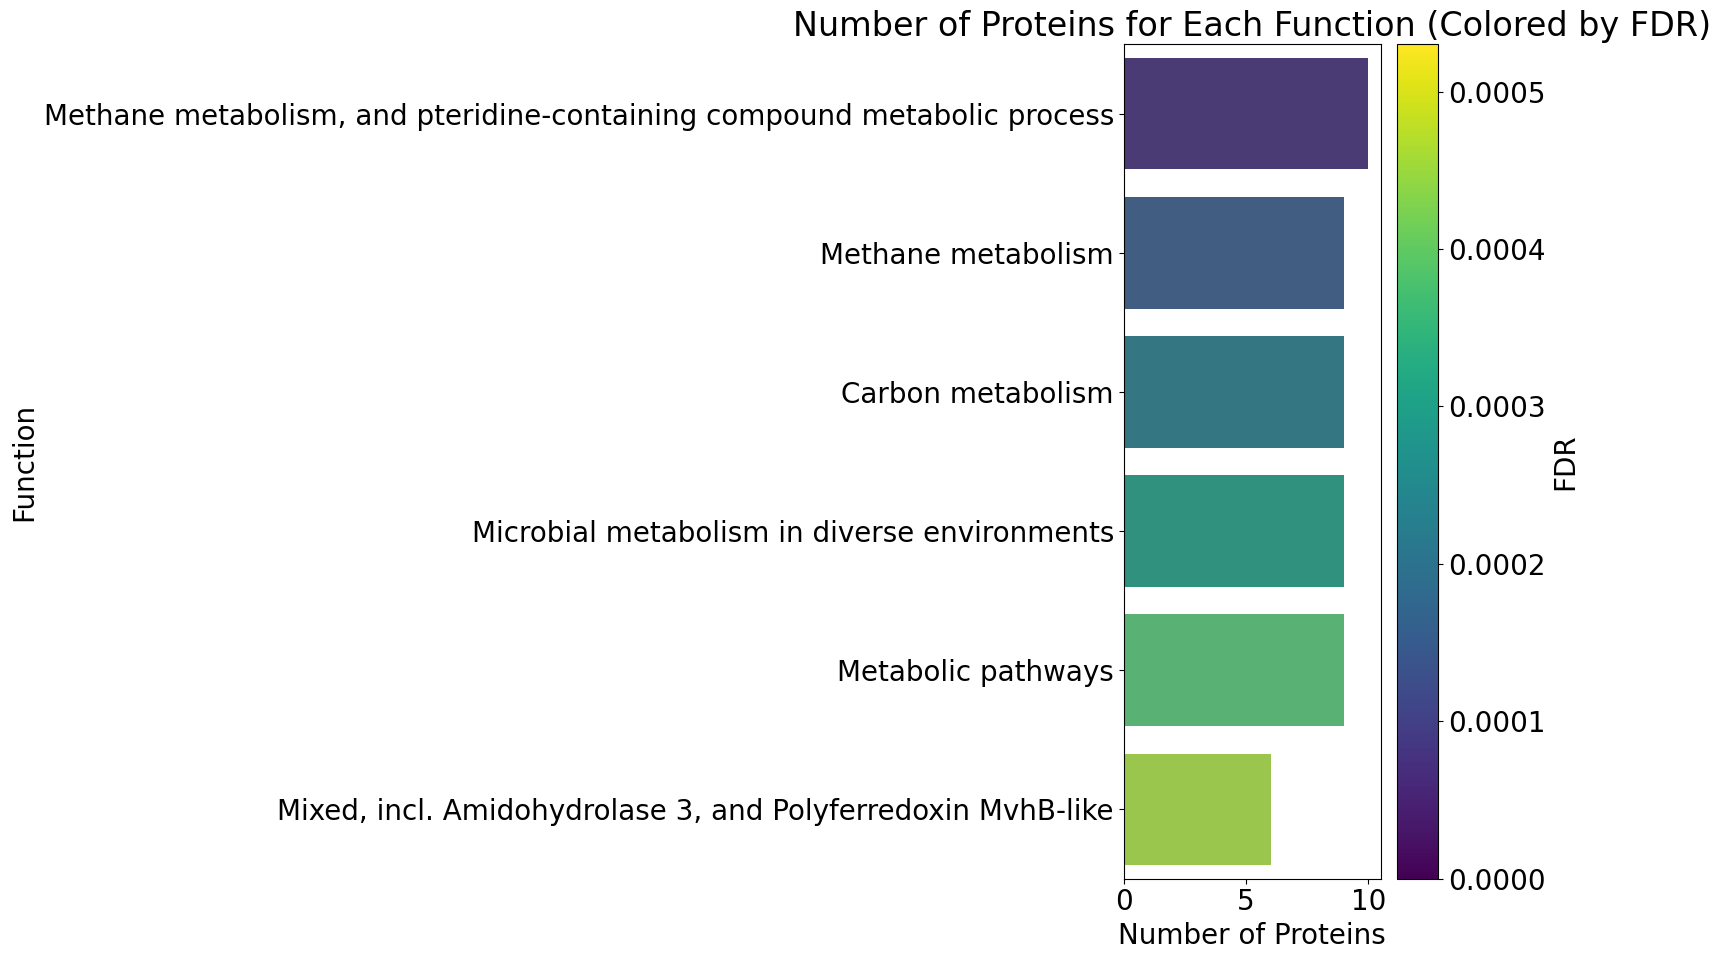

In [ ]:
# Step 9: Create and save a bar graph displaying the number of proteins for each function, colored by False Discovery Rate (FDR).

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import os

# Define the output directory
output_dir = '/content/results'
output_path = f'{output_dir}/string_result'
os.makedirs(output_path, exist_ok=True)

# Load the CSV file (the input file)
csv_file = 'your_functional_enrichment_results_path'
df = pd.read_csv(csv_file)

# Sort the data in descending order based on 'Count_in_Set' and limit to the top 30
df = df.sort_values(by='Count_in_Set', ascending=False).head(30)

# Create a color palette based on FDR values
norm = mpl.colors.Normalize(vmin=df['FDR'].min(), vmax=df['FDR'].max())
cmap = cm.get_cmap('viridis')  # Set the color map
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create the bar graph
plt.figure(figsize=(15, 10))  # Adjust the figure size
barplot = sns.barplot(x='Count_in_Set', y='description', data=df, palette="viridis")

# Add a color bar
cbar = plt.colorbar(sm, ax=barplot, orientation='vertical')
cbar.set_label('FDR')  # Label for the color bar

# Set the labels and title of the graph
plt.xlabel('Number of Proteins')
plt.ylabel('Function')
plt.title('Number of Proteins for Each Function (Colored by FDR)')

plt.tight_layout()  # Adjust the layout

# Save the graph as an image
output_image_path = f'{output_path}/functional_enrichment_results_Colored_by_FDR.png'
plt.savefig(output_image_path)
plt.show()

# Close the graph after saving
plt.close()